In [300]:
%%time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

Wall time: 0 ns


# Calibration of the Glucometer

# Mapping Microcontroller Values to Glucose Concentration

In [301]:
CalData = pd.read_excel('DiabeaTiT_Calibration Data.xlsx')
CalData.head()

,Test Solution Concentration,Output values from Microcontroller
0,0.300000,110.465128
1,0.313568,193.581632
2,0.327136,147.273854
3,0.340704,35.719369
4,0.354271,73.565196


Text(0.5,1,'Calibration Data')

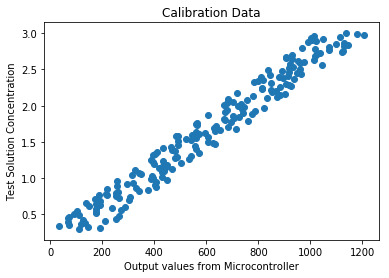

In [302]:
plt.scatter(np.array(CalData['Output values from Microcontroller']),np.array(CalData['Test Solution Concentration']))
plt.xlabel('Output values from Microcontroller')
plt.ylabel('Test Solution Concentration')
plt.title('Calibration Data')

In [303]:
X_Micro = np.array(CalData['Output values from Microcontroller']).reshape(-1,1)

In [304]:
X_Sal = np.array(CalData['Test Solution Concentration']).reshape(-1,1)

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X_Micro, X_Sal, random_state = 0) 

In [306]:
Error_Percent = {}
trained_models = {}

In [307]:
def score(x,y):
    x = np.array(x)
    y = np.array(y)    
    return 100 - np.mean((x-y)**2)**0.5*100/np.mean(x)

# Correlation between Microcontroller Values and Glucose Concentration

# Information Entropy based algorithms 

30.457604359076072


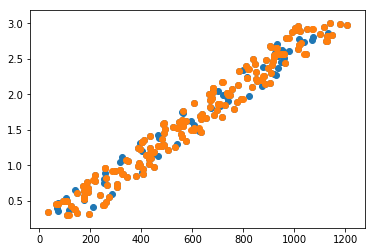

In [308]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
Error_Percent['Information Entropy based ML algorithms'] = score(y_test,y_pred)
print(score(y_test,y_pred))
y_predf = regr.predict(X_Micro)
plt.scatter(X_Micro,X_Sal)
plt.scatter(X_Micro,y_predf)
trained_models['Information Entropy based ML algorithms'] = regr

# Polynomial regression using gradient dissent

 Error Percentage:  8.677417217014053 
 Degree of Polynomial:  3


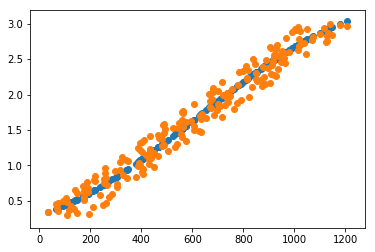

In [309]:
from sklearn.preprocessing import PolynomialFeatures

models = []
# Test upto 10 degree polynomial

for j in range(10):
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_train)
    models.append(poly_x)

from sklearn.linear_model import LinearRegression

regressors = []
y_preds = []
mses = []

for model in models:
    regressor = LinearRegression()
    regressor.fit(model,y_train)
    regressors.append(regressor)

j=0
min_mse = -1
minj = -1

for regressor in regressors:
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_test)    
    y_pred  = regressor.predict(poly_x)
    mse = 100 - score(y_test,y_pred)
    
    if(j==0):
        min_mse = mse
        minj = 0
    elif(min_mse>mse):
        min_mse = mse
        minj = j
    j+=1


print(' Error Percentage: ', min_mse, '\n' , 'Degree of Polynomial: ',minj)
Error_Percent['Polynomial_Regression'] = min_mse
poly = PolynomialFeatures(degree=minj)
poly_x = poly.fit_transform(X_Micro)    
y_pred  = regressors[minj].predict(poly_x)
plt.scatter(X_Micro,y_pred)
plt.scatter(X_Micro,X_Sal)
trained_models['Polynomial_Regression'] = regressors[minj]
ArdtoGlc = regressors[minj]

# Mapping Glucose Concentration in Saliva to that of Blood

In [310]:
Sal_to_Blood_Data = pd.read_excel('DiabeaTiT_SaltoBlood.xlsx')
Sal_to_Blood_Data.head()

,Salivary Glucose Concentration,Blood Glucose Concentration
0,1.296094,110.260027
1,1.301530,65.923150
2,1.411458,96.978819
3,1.436916,94.776040
4,1.357038,99.435002


In [311]:
X_Sal1 = np.array(Sal_to_Blood_Data['Salivary Glucose Concentration']).reshape(-1,1)
Y_Blood_Glucose = np.array(Sal_to_Blood_Data['Blood Glucose Concentration']).reshape(-1,1)

# Information Entropy based algorithms 

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X_Sal1, Y_Blood_Glucose, random_state = 0) 
Error_Percent = {}
trained_models = {}

59.6090135577743


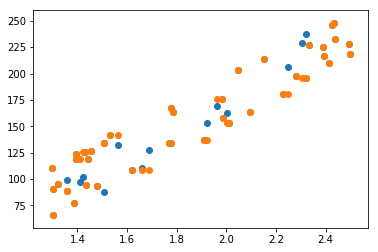

In [313]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
Error_Percent['Information Entropy based ML algorithms'] = score(y_test,y_pred)
print(score(y_test,y_pred))
y_predf = regr.predict(X_Sal1)
plt.scatter(X_Sal1,Y_Blood_Glucose)
plt.scatter(X_Sal1,y_predf)
trained_models['Information Entropy based ML algorithms'] = regr

# Polynomial regression using gradient dissent

 Error Percentage:  9.944771899414178 
 Degree of Polynomial:  2


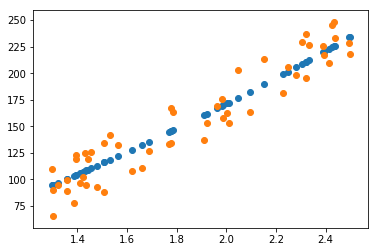

In [314]:
from sklearn.preprocessing import PolynomialFeatures

models = []
# Test upto 10 degree polynomial

for j in range(10):
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_train)
    models.append(poly_x)

from sklearn.linear_model import LinearRegression

regressors = []
y_preds = []
mses = []

for model in models:
    regressor = LinearRegression()
    regressor.fit(model,y_train)
    regressors.append(regressor)

j=0
min_mse = -1
minj = -1

for regressor in regressors:
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_test)    
    y_pred  = regressor.predict(poly_x)
    mse = 100 - score(y_test,y_pred)
    
    if(j==0):
        min_mse = mse
        minj = 0
    elif(min_mse>mse):
        min_mse = mse
        minj = j
    j+=1


print(' Error Percentage: ', min_mse, '\n' , 'Degree of Polynomial: ',minj)
Error_Percent['Polynomial_Regression'] = min_mse
poly = PolynomialFeatures(degree=minj)
poly_x = poly.fit_transform(X_Sal1)    
y_pred  = regressors[minj].predict(poly_x)
plt.scatter(X_Sal1,y_pred)
plt.scatter(X_Sal1,Y_Blood_Glucose)
trained_models['Polynomial_Regression'] = regressors[minj]
SaltoBloodGlc = regressors[minj]
l = SaltoBloodGlc.coef_

In [315]:
l = np.array([2.5]).reshape(-1,1)
l = SaltoBloodGlc.predict(poly.fit_transform(l))

In [336]:
MctoBlood(350)

62

In [323]:
def MctoBlood(x):
    x = np.array([x]).reshape(-1,1)
    y = ArdtoGlc.predict(PolynomialFeatures(degree=3).fit_transform(x))
    y = np.array([y]).reshape(-1,1)
    z = SaltoBloodGlc.predict(PolynomialFeatures(degree=2).fit_transform(y))
    return int(z)

# Final Calibration: Microcontroller Values to Blood Glucose Concentration

In [339]:
MicroController_to_Blood_Glucose = np.array([MctoBlood(i) for i in range(1024)])[350:]
f = np.arange(350,1024)

Text(0,0.5,'Glucose Concentration in Blood')

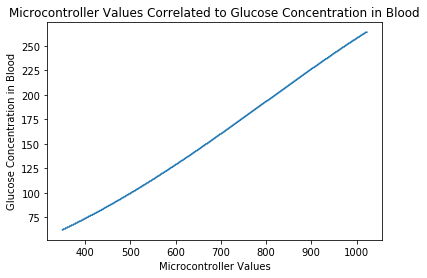

In [340]:
plt.plot(f,MicroController_to_Blood_Glucose)
plt.title('Microcontroller Values Correlated to Glucose Concentration in Blood')
plt.xlabel('Microcontroller Values')
plt.ylabel('Glucose Concentration in Blood')

In [341]:
df3 = pd.DataFrame()
df3['MicroController Values'] = f
df3['Blood Glucose Concentration Values'] = MicroController_to_Blood_Glucose
df3.to_excel('DiabeaTiT_MicroController_to_Blood_Glucose.xlsx')

In [342]:
ArdtoGlc.coef_

array([[ 0.00000000e+00,  1.03820866e-03,  2.85167552e-06,
        -1.52347882e-09]])

In [345]:
ArdtoGlc.coef_

array([[ 0.00000000e+00,  1.03820866e-03,  2.85167552e-06,
        -1.52347882e-09]])

In [347]:
SaltoBloodGlc.coef_

array([[ 0.        , 61.58593563, 14.3749855 ]])